# Masks

#### This code aims to create an overview of the mask sales performance over time.

Mindful Mom Art is an online store that sells reusable goods for families. Our study aims to create a data visualization of how the mask products impacted the store. 

The data that is available to us is from January to July, 2020. But the store started selling masks in March, so we will focus the period of time from March to July.


The store took off around March/April as the first Etsy store to offer masks when the pandemic hit.
After April, when the pandemic curve began to flatten, there were changes in the market that can be clearly visualized in some the graphs plotted here.


Let's begin our endeavor...

### Upload the data and the libraries

In [40]:
# Let's import the libraries used in this study
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

In [41]:
# Let's read the csv data then save it in a dataframe named df
df = pd.read_csv('DataCleaned.csv', parse_dates = ['Sale Date', 'Date Paid', 'Date Shipped'], index_col=[0])

In [42]:
# Let's select only the period of time from March to July for df
start = '2020-03-01' 
stop = '2020-07-31' 
df = df[df['Sale Date'].between(start, stop)]

In [43]:
df.head(3)

,Sale Date,Item Name,Quantity,Price,Shipping Discount,Order Shipping,Order Sales Tax,Item Total,Date Paid,Date Shipped,Ship City,Ship State,Ship Zipcode,Ship Country,Variations,Item Type
0,2020-07-15,Mask - Unicorns,1,14.0,0.0,3.64,0.0,14.0,2020-07-15,NaT,SARASOTA,FL,NaN,United States,Kids,Mask
1,2020-07-15,Mask - Cats,1,16.0,0.0,3.54,0.0,16.0,2020-07-15,NaT,Washington,DC,NaN,United States,Adults,Mask
2,2020-07-15,Mask - Daisies,1,16.0,0.0,3.98,0.0,16.0,2020-07-15,NaT,Anaheim,CA,NaN,United States,Adults,Mask


In [44]:
df.tail(3)

,Sale Date,Item Name,Quantity,Price,Shipping Discount,Order Shipping,Order Sales Tax,Item Total,Date Paid,Date Shipped,Ship City,Ship State,Ship Zipcode,Ship Country,Variations,Item Type
1061,2020-03-03,Teething Ring - Watermelon,1,9.5,3.50,0.0,0.0,9.5,2020-03-03,2020-03-03,Hampton,VA,NaN,United States,NaN,Teething Ring
1062,2020-03-03,Pads - Grey Triangles,1,45.0,3.54,0.0,0.0,45.0,2020-03-03,2020-03-03,Ypsilanti,MI,NaN,United States,NaN,Pads
1063,2020-03-02,Pads - Grey Triangles,1,45.0,3.54,0.0,0.0,45.0,2020-03-02,2020-03-03,Leo,IN,NaN,United States,NaN,Pads


In [45]:
# Let's reduce the size of the Dataframe to save space in the disk (see 'Data Cleaning' code for more information)
df["Item Name"] = df["Item Name"].astype("category")
df["Ship State"] = df["Ship State"].astype("category")
df["Ship Country"] = df["Ship Country"].astype("category")
df["Variations"] = df["Variations"].astype("category")
df["Item Type"] = df["Item Type"].astype("category")
df["Quantity"] = df["Quantity"].astype("int")

### Mask Dataframe & Mask Dataframe Period of Time

In [46]:
# Let's create a specific dataframe from df for only masks and name it df_mask
df_mask = df[df['Item Type'] == 'Mask']

In [47]:
# From df and df_mask, let's define new dataframes for each month of the year (from March to July)

# March
start = '2020-03-01' 
stop = '2020-03-31' 
df_march = df[df['Sale Date'].between(start, stop)]
df_mask_march = df_mask[df_mask['Sale Date'].between(start, stop)]
# April
start = '2020-04-01' 
stop = '2020-04-30' 
df_april = df[df['Sale Date'].between(start, stop)]
df_mask_april = df_mask[df_mask['Sale Date'].between(start, stop)]
# May
start = '2020-05-01' 
stop = '2020-05-31' 
df_may = df[df['Sale Date'].between(start, stop)]
df_mask_may = df_mask[df_mask['Sale Date'].between(start, stop)]
# June
start = '2020-06-01' 
stop = '2020-06-30' 
df_june = df[df['Sale Date'].between(start, stop)]
df_mask_june = df_mask[df_mask['Sale Date'].between(start, stop)]
# July
start = '2020-07-01' 
stop = '2020-07-31' 
df_july = df[df['Sale Date'].between(start, stop)]
df_mask_july = df_mask[df_mask['Sale Date'].between(start, stop)]

In [48]:
# Let's create some variables related to the revenue of the most important items sold in the store.
revenue_mask = [df_mask_march['Item Total'].sum(), df_mask_april['Item Total'].sum(),
                df_mask_may['Item Total'].sum(), df_mask_june['Item Total'].sum(),
                df_mask_july['Item Total'].sum()]
revenue_others = [df_march['Item Total'].sum()-revenue_mask[0], df_april['Item Total'].sum()-revenue_mask[1],
                  df_may['Item Total'].sum()-revenue_mask[2], df_june['Item Total'].sum()-revenue_mask[3],
                  df_july['Item Total'].sum()-revenue_mask[4]] 

### Plot Functions

In [49]:
def mask_others_plot(df_t, df_m, period):
    ''' Function that plots the Number of items masks sold and the percentage of mask sold'''
    
    # First, let's plot the percentage of masks sold and other items
    fig = plt.figure(figsize=(10,5), dpi=90)
    colors = ['#0077c5', '#f3a001'] 
    labels = 'Masks', 'Others'
    sizes = [len(df_m)/len(df_t), 1-len(df_m)/len(df_t)]
    explode = (0.1, 0.1) 
    
    ax1 = plt.subplot2grid((1,2),(0,1))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0, colors = colors)
    ax1.axis('equal')  
    ax1.set_title('Percentage of Masks Sold - ' + period)


    # Let's plot a bar chart with the number of items sold
    ax2 = plt.subplot2grid((1,2),(0,0))
    ax2.grid(zorder=0)
    ax2.bar(list(labels), [len(df_m), len(df_t)-len(df_m)], zorder = 3, color = colors)
    ax2.set_title('Number of Items Sold - ' + period)

    plt.show()

In [50]:
def mask_others_plot2(df_t, df_m, period):
    '''Function that plots the Number of items masks sold and other items per month'''
    
    labels = ['March', 'April', 'May', 'June', 'July']
    others = [df_t[0]-df_m[0], df_t[1]-df_m[1], df_t[2]-df_m[2], df_t[3]-df_m[3], df_t[4]-df_m[4]]
    masks = [df_m[0], df_m[1], df_m[2], df_m[3], df_m[4]]
    colors = ['#0077c5', '#f3a001']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5), dpi=90)
    rects1 = ax.bar(x + width/2, masks, width, label='Masks', color = colors[0])
    rects2 = ax.bar(x - width/2, others, width, label='Others', color = colors[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Items Sold')
    ax.set_title('Number of Items Sold - ' + period)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -1),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()

    plt.show()

In [51]:
def sizes_plot(df_mask, period):
    '''Function that plots the number and percentage of the masks sizes. '''
    
    # Lets define some variables used in this fuction
    df_mask_var = df_mask['Variations'].value_counts().head(4)
    n_total = df_mask_var.sum()
    n_adults = df_mask_var['Adults']
    n_teens = df_mask_var['Teens']
    n_kids = df_mask_var['Kids']
    n_toddlers = df_mask_var['Toddlers']

    # Let's plot the number of the mask sizes
    fig = plt.figure(figsize=(10,5), dpi=90)
    
    colors = ['#0077c5','#f3a001', '#ff618c', '#01a900'] 
    labels = 'Adults', 'Teens', 'Kids', 'Toddlers'
    sizes = [n_adults/n_total, n_teens/n_total, n_kids/n_total, n_toddlers/n_total,]
    explode = (0.1, 0.1, 0.1, 0.1) 
    
    ax1 = plt.subplot2grid((1,2),(0,1))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0, colors = colors)
    ax1.axis('equal')  
    ax1.set_title('Percentage of Masks Sizes Sold - ' + period)


    # Let's plot a bar chart with the number of items sold
    ax2 = plt.subplot2grid((1,2),(0,0))
    ax2.grid(zorder=0)
    ax2.bar(list(labels), [n_adults, n_teens, n_kids, n_toddlers], zorder = 3, color = colors)
    ax2.set_title('Number of Sizes Sold - ' + period)

      
    plt.show()

In [52]:
# Definition of the variable states orders: Dic with the name of the state and number of orders for the map plot below
states = pd.read_excel('states.xlsx', index_col = 'Abbreviation')
states_masks = df_mask['Ship State'].value_counts().reset_index(drop=False)
states_orders = {}
for i in range(0,len(states_masks)):
    try:
        states_orders[states.loc[states_masks.iloc[i,0]][0]] = states_masks.iloc[i,1]
    except KeyError:
        # Ignore the state if it is outside US
      continue

In [53]:
def add_insetmap(axes_extent, map_extent, state_name, facecolor, edgecolor, geometry):
    '''Function that creates axes and sets its projection for the US Map plot'''
    
    # create new axes, set its projection
    use_projection = ccrs.Mercator()     # preserve shape well
    geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
    sub_ax = plt.axes(axes_extent, projection=use_projection)  # normal units
    sub_ax.set_extent(map_extent, geodetic)  # map extents

    sub_ax.set_title(state_name)
    sub_ax.add_geometries([geometry], ccrs.PlateCarree(), \
                          facecolor=facecolor, edgecolor=edgecolor)
    
def plot_map(states_orders):  
    '''Function that plots the US Map and colors the states that ordered masks'''
    
    fig = plt.figure(figsize=(10,5), dpi=90)
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    ax.set_title('States that Ordered Masks')

    for state in shpreader.Reader(states_shp).records():
        edgecolor = 'White'
        try:
            # use the name of this state to get number of orders per state
            state_dens = states_orders[ state.attributes['name'] ]
        except:
            state_dens = 0

        # simple scheme to assign color to each state
        pallete_list = [ 'darkblue','mediumblue','Blue', 'RoyalBlue', 'cornflowerblue', 'LightGray']
        if state_dens == 0:
            facecolor = pallete_list[-1]
        elif state_dens > 150:
            facecolor = pallete_list[0]
        elif state_dens > 100:
            facecolor = pallete_list[1]
        elif state_dens > 50:
            facecolor = pallete_list[2]
        elif state_dens > 20:
            facecolor = pallete_list[3]
        else:
            facecolor = pallete_list[4]
        
        # special handling for the 2 states
        if state.attributes['name'] in ("Alaska", "Hawaii"):
            state_name = state.attributes['name']
            if state_name == "Alaska":
                map_extent = (-178, -135, 46, 73)    # degrees: (lonmin,lonmax,latmin,latmax)
                axes_extent = (0.04, 0.06, 0.29, 0.275) # axes units: 0 to 1, (LLx,LLy,width,height)

            if state_name == "Hawaii":
                map_extent = (-162, -152, 15, 25)
                axes_extent = (0.27, 0.06, 0.15, 0.15)

            # add inset maps
            add_insetmap(axes_extent, map_extent, state_name, facecolor, edgecolor, state.geometry)

        # the other states go here
        else:
            #`state.geometry` is the polygon to plot
            ax.add_geometries([state.geometry], ccrs.PlateCarree(),
                              facecolor=facecolor, edgecolor=edgecolor)

    plt.show()

In [54]:
def plot_states(sf_state):
    '''Plots a bar chart with the number of orders from the top 5 states.'''
   
    names = df_state.index
    values = df_state
    
    fig, ax = plt.subplots(figsize=(10, 5), dpi=90, sharey=True)
    ax.grid(zorder=0)
    ax.bar(names, values, zorder = 3)
    ax.set_title('Number of Order per State - from March to July')

In [55]:
def processing_time(df_mask_dt): 
    '''Plots the percentage of the processing time from 0 to 5 days.'''
    
    # Let's define some variables used in the plot
    n_total = df_mask_dt.sum()
    n_0days = df_mask_dt['0 days']
    n_1days = df_mask_dt['1 days']
    n_2days = df_mask_dt['2 days']
    n_3days = df_mask_dt['3 days']
    n_45days = df_mask_dt['4 days']+df_mask_dt['5 days']

    labels = '0 Day', '1 Day', '2 Days', '3 Days', '+4 Days'
    sizes = [n_0days/n_total, n_1days/n_total, n_2days/n_total, n_3days/n_total, n_45days/n_total]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Time to Ship an Order - from March to July')
    plt.show()

In [56]:
def popular_pattern(df_mask):
    '''Plots the 10 most popular masks pattern.'''
    
    # Let's start by creating a dataframe with the 10 most popular masks.
    n = 10 # Rank of the most popular mask pattern analyzed
    df_pattern = df_mask['Item Name'].value_counts().head(n)
    df_pattern.index = df_pattern.index.str.split('-')
    # Let's select only the pattern name of the masks
    index_list = []
    for i in range(0,len(df_pattern.index)):
        index_list.append(df_pattern.index[i][1].strip())
    df_pattern.index = index_list
    return df_pattern

In [57]:
def revenue_month(revenue_mask, revenue_others):
    '''Plots the Revenue in Dollars versus the Months from March to July'''
    
    year = ['March', 'Abril', 'May', 'June', 'July']
    population_by_continent = {
        'Masks': revenue_mask,
        'Total': revenue_others,
    }

    fig, ax = plt.subplots()
    ax.stackplot(year, population_by_continent.values(),
                 labels=population_by_continent.keys())
    ax.legend(loc='upper left')
    ax.set_title('Revenue')
    ax.set_xlabel('Month')
    ax.set_ylabel('Renenue (dollars)')


    plt.show()

In [58]:
def revenue_percentage(df, df_mask):
    '''Plots the revenue percentage from masks and other items.'''
    
    # Let's create some variables related to the revenue of the most important items sold in the store.
    revenue_t = df['Item Total'].sum()
    revenue_m = df_mask['Item Total'].sum()
    revenue_p = df[df['Item Type'] == 'Pads']['Item Total'].sum()
    revenue_u = df[df['Item Type'] == 'Unpaper Towels']['Item Total'].sum()
    revenue_o = revenue_t - revenue_m - revenue_p - revenue_u 

    # Let's plot our pie chart with the most significant items
    labels = 'Mask', 'Pads', 'Unpaper Towels', 'Others'
    sizes = [revenue_m/revenue_t, revenue_p/revenue_t, revenue_u/revenue_t,  revenue_o/revenue_t]
    explode = (0.1, 0.1, 0.1, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Revenue Percentage per Item Type - from March to July')
    plt.show()

## Comparing the Number of Masks Sold with Others Items

#### In this section let's compare the total quantity and the percentage of masks sold to the other items sold in the store. 

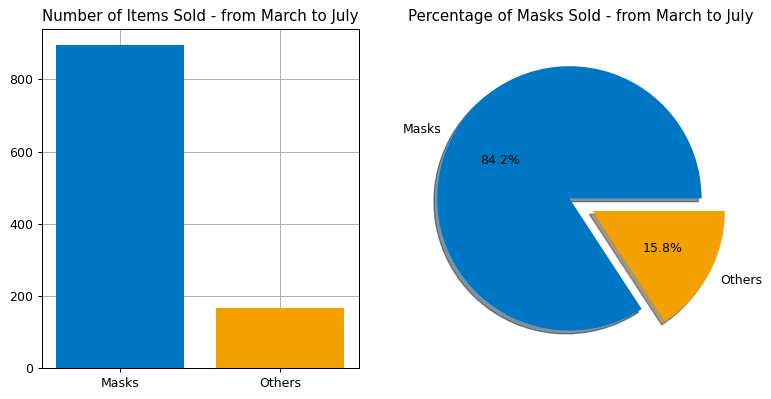

In [59]:
mask_others_plot(df, df_mask, 'from March to July')

In [60]:
df_t = [len(df_march), len(df_april), len(df_may), len(df_june), len(df_july)]
df_m = [len(df_mask_march), len(df_mask_april), len(df_mask_may), len(df_mask_june), len(df_mask_july)]

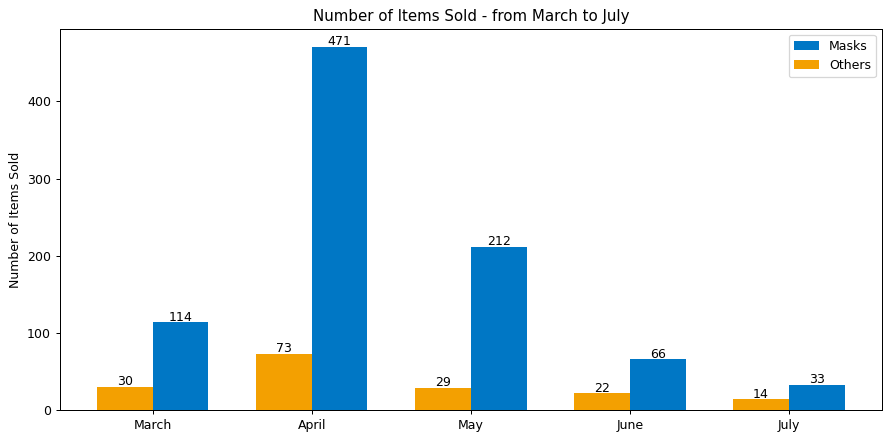

In [61]:
mask_others_plot2(df_t, df_m, 'from March to July')

## Mask Sizes Sold

#### This section shows the number and the percentage of mask sizes sold. 
There are four mask sizes: Toddlers, Kids, Teens and Adults.

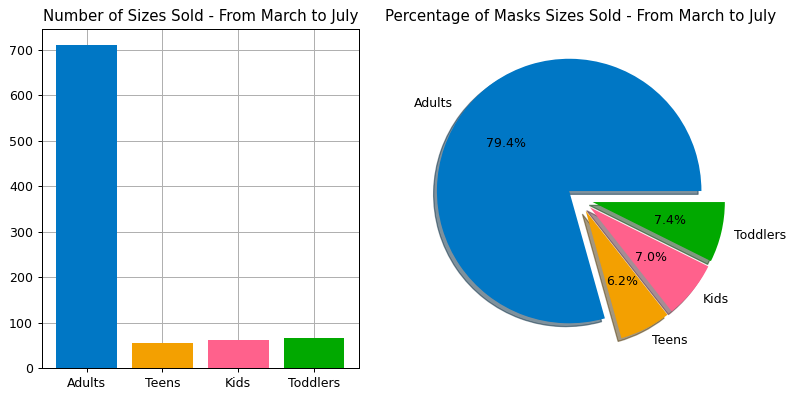

In [62]:
sizes_plot(df_mask, 'From March to July')

## States Shipped

#### In this section we evaluate the states where the masks ordered.
The first graph shows map of the states that ordered masks. While the second plot shows the top 5 states where the masks were ordered from March to July.

In this section we can evaluate the top five states where the masks were ordered.

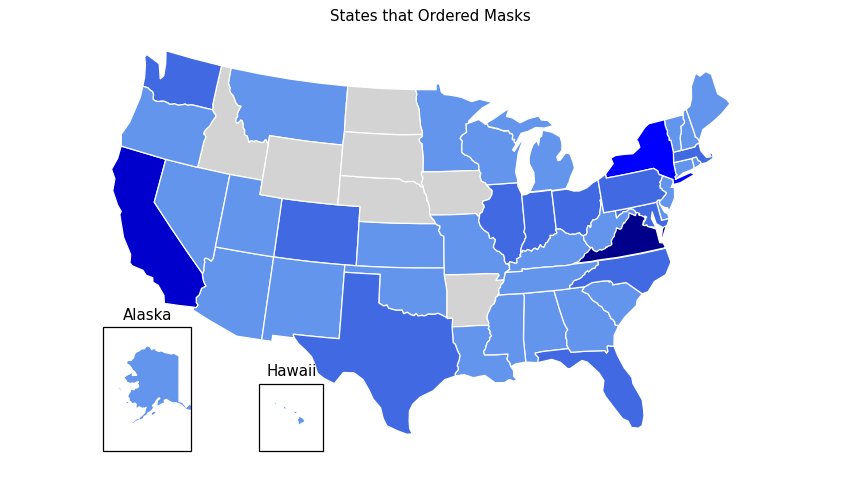

In [63]:
# Plot the Map of the states and colors that states that ordered masks
plot_map(states_orders)

In [68]:
## For the second part, let's start with a Series with the top 5 states and their respective number of orders
df_state = df_mask['Ship State'].value_counts().sort_values(ascending=False).head()
df_state.sort_values(ascending=True, inplace=True)
df_state

MA     43
TX     49
NY     64
CA    116
VA    165
Name: Ship State, dtype: int64

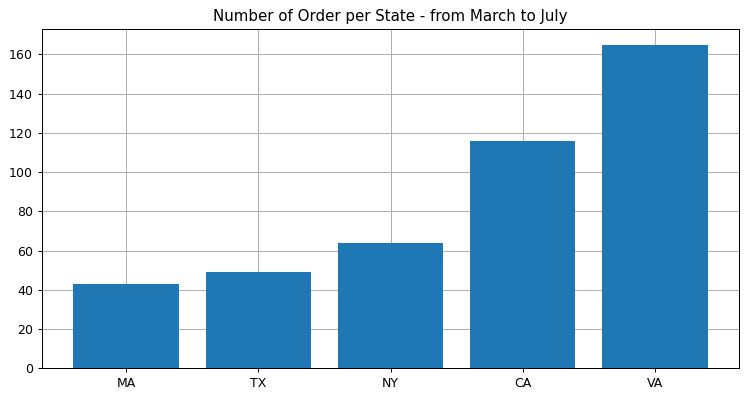

In [69]:
# Let's plot a bar chart with the number of orders from the top 5 states
plot_states(df_state)

## Processing Shipping Time

#### This section evaluates the processing time, which is the time the ordered was place to the time it was shipped.

In [70]:
# Lets Create a Series with the processing time and the number of orders
df_mask_dt = (df_mask['Date Shipped']-df_mask['Date Paid']).dropna().value_counts()
df_mask_dt

1 days    382
0 days    228
2 days    213
3 days     41
4 days     21
5 days      3
dtype: int64

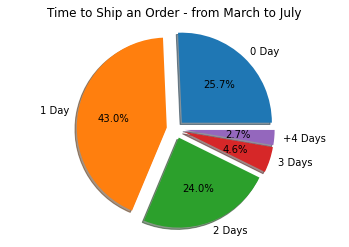

In [71]:
# Plot the PIE Chart
processing_time(df_mask_dt)

## The most popular mask pattern

#### There are several patterns available for the masks, however, the customers have some pattern preferences... 
Let's study the 10 most popular mask patterns in this section.

In [72]:
popular_pattern(df_mask)

Dark Green          88
Music Notes         85
Sketch Art          68
Beautiful Garden    53
Gray                48
Bananas on Blue     43
Bananas on Pink     42
Blue                29
Light Purple        29
Dark Gray           28
Name: Item Name, dtype: int64

## Revenue per Item

#### Where does the revenue come from? The masks? Pads? Unpaper towels? 
We know so far that the most sold items are masks, but their cost is relatively low if compared to the set of pads for example.
Let's analyze in this section where out revenue comes from.

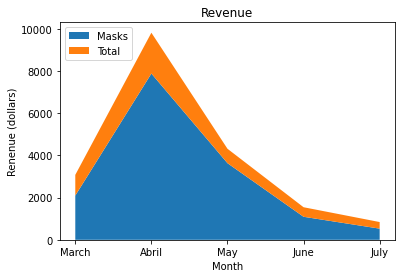

In [73]:
revenue_month(revenue_mask, revenue_others)

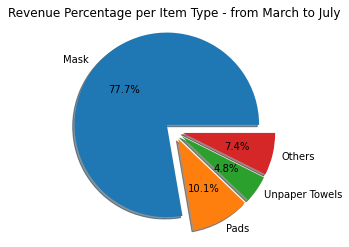

In [74]:
revenue_percentage(df, df_mask)